In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.io
import skimage.color
import skimage.filters
import matplotlib.gridspec as gridspec

**Scaling Function**: Used to scaled the values between 0 and 1.  Scaling is necessary before displaying an image because it ensures that the pixel values are in a suitable range for visual perception.


In [ ]:
def image_scaler(image):
  scaled_image = ((image - np.min(image)) / ((np.max(image) - np.min(image))))
  return scaled_image

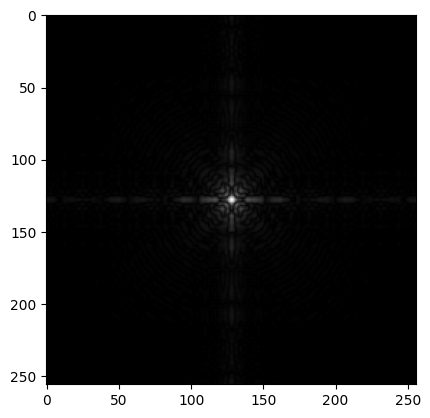

In [ ]:
img1 = cv2.imread("/content/star.tif")
plt.imshow(img1, cmap='gray')
plt.show()

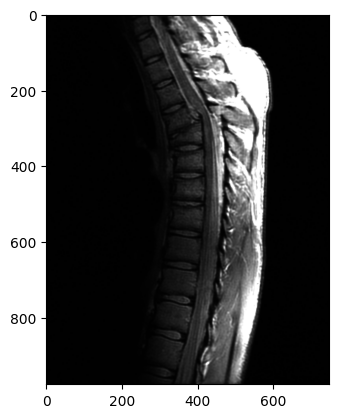

In [ ]:
img2 = cv2.imread("/content/spine.tif")
plt.imshow(img2, cmap='gray')
plt.show()

#Task 1

Implement nonlinear Transformation functions:
<ol>
<li> Log Transformation </li>
<li> Power-law Transformation </li>
</ol>

In [ ]:


def log_transform(gray_image, constant=1, base=2, epsilon=1e-10):
    #implement this function
    image_arr = np.array(gray_image)
    scaled_image = image_scaler(image_arr)
    log_image = constant * scaled_image * (np.log(1 + image_arr + epsilon) / np.log(base))

    return log_image

def power_transform(gray_image, gamma=1, constant=1):
    image_arr = np.array(gray_image)
    scaled_image = image_scaler(image_arr)
    power_image = constant * (scaled_image ** gamma)

    return power_image


# Task 1: Output and Analysis
Use your previously implemented functions to show the outputs of log transform and power transform on a sample image. Provide your analysis on the following topics:
<ol>
<li> Which function is suitable for which type of images? </li>

<li> Why is intensity scaling required before display? </li>
</ol>

**Log Transformation**: Maps a narrow range of low intensity values in the input into a wider range of output levels. The dark pixels have become brighter making it more visible.

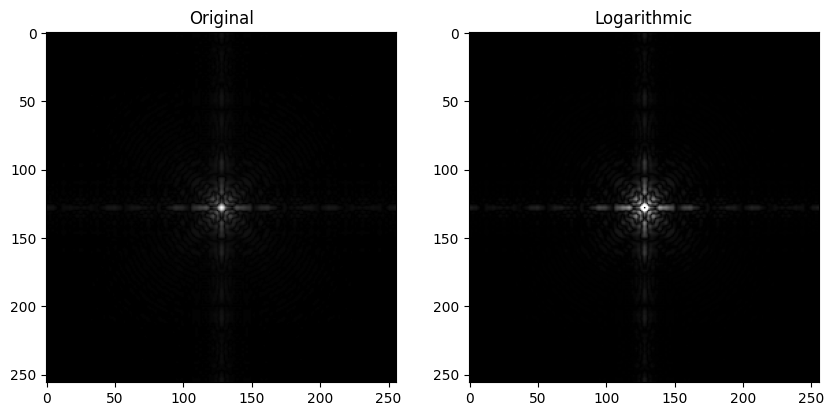

In [ ]:
# Log Transformation Output
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.title("Original")

plt.subplot(2,2,2)
log_trans = log_transform(img1,1,10)
plt.imshow(log_trans, cmap='gray')
plt.title("Logarithmic")


plt.show()

**Power Transformation**: Maps a narrow range of dark input values into a wider range of output values, and the other way around. As gamma decreases more details in the background are exposed but starts to reduce contrast making a washed out appearence. With higher values of gamma, the image darkens

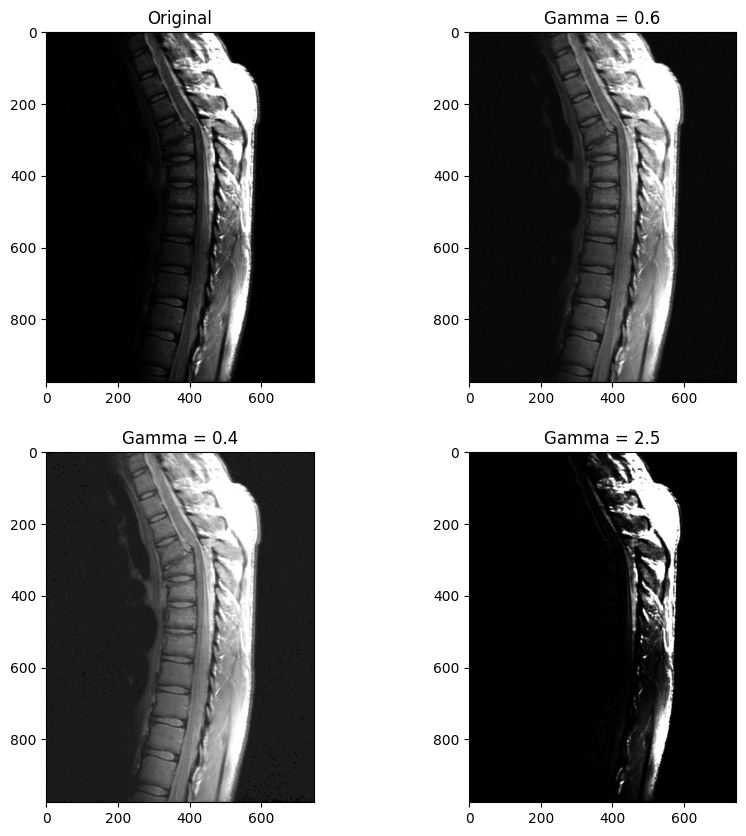

In [ ]:

# Plotting
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 1)
plt.imshow(img2, cmap='gray')
plt.title("Original")

plt.subplot(2, 2, 2)
log_trans = power_transform(img2, gamma=0.6, constant=1)
plt.imshow(log_trans, cmap='gray')
plt.title("Gamma = 0.6")

plt.subplot(2, 2, 3)
log_trans = power_transform(img2, gamma=0.4, constant=1)
plt.imshow(log_trans, cmap='gray')
plt.title("Gamma = 0.4")

plt.subplot(2, 2, 4)
log_trans = power_transform(img2, gamma=2.5, constant=1)
plt.imshow(log_trans, cmap='gray')
plt.title("Gamma = 2.5")

plt.show()


<h2>Q1. Which function is suitable for which type of images?</h2>

<b>Answer :</b>

Log Transformation is effective at expanding a narrow range of low-intensity values in the input image to a broader range in the output. It works particularly well for images with a wide range of intensity levels, especially those dominated by darker pixels. This technique is commonly used to improve the visibility of details in dim or low-contrast areas, making darker regions appear brighter and enhancing subtle details.

Power Law (Gamma) Transformation is ideal for adjusting the contrast of an image, especially when there’s a need to enhance details in either the darker or brighter regions. Power-law curves with fractional gamma values map a small range of dark input values to a wider range in the output, and vice versa. This makes it suitable for darkening bright images or brightening dark ones, depending on the desired effect.

<h2>Q2. Why is intensity scaling required before display?</h2>

<b>Answer :</b>
Before displaying an image, scaling is required to make sure that the pixel values are within an acceptable range for human vision. The details in the entire range of available intensities are not efficiently exploited when the range is between 0 and 1, which results in poor contrast and diminished visibility of details. The image is more accurately represented and the details are more evident when the intensities are scaled from 0 to 255, which improves the image's readability for the human eye.



# Task 2
Implement Global Histogram Equalization on gray-scale images

**Histogram**: This function is basically my version of histogram plotting

In [ ]:
def histogram(image,N = 0, print = 0):
    frequency_array = np.zeros(256, dtype=int)
    for row in image:
      for value in row:
        frequency_array[value] += 1

    if N:
        factor = image.shape[0] * image.shape[1]
        frequency_array = frequency_array/factor

    if print :
      x = np.arange(0,256)
      plt.bar(x, frequency_array)
      plt.title("Histogram")
      plt.show()
      return

    return frequency_array

**CDF Generator**: This function is used to generate the CDF of the histogram which is essential for enhancing contrast and improving image visibility by redistributing pixel intensities effectively.

In [ ]:
def cdf_generator(image, print = 0):
    num_channels = image.shape[2]

    if num_channels == 3:
      gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    else:
       gray_image == image

    hist = histogram(gray_image)
    cdf = hist.cumsum()
    cdf = (cdf*255) / cdf.max()

    if print:
      x = np.arange(0,256)
      plt.bar(x, cdf)
      plt.title("CDF")
      plt.show()
      return

    return cdf

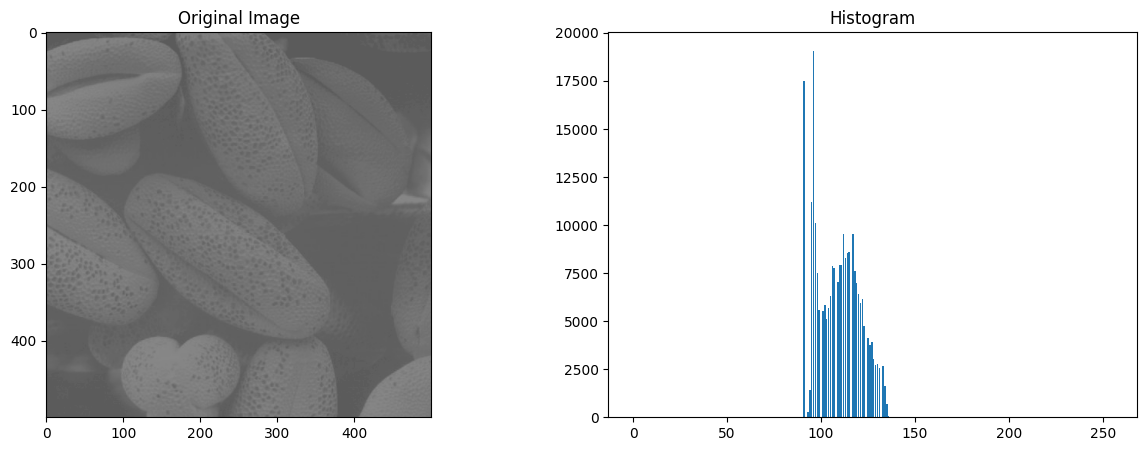

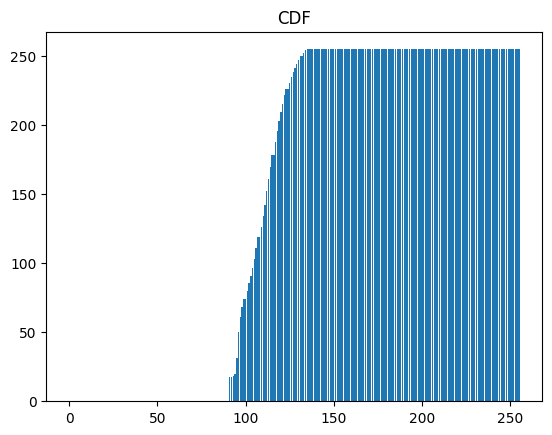

In [ ]:
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)

plt.subplot(1,2,1)
img3 = cv2.imread("/content/beans2.tif")
plt.imshow(img3, cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.title("Histogram")
histogram(img3,print = 1)

plt.show()

cdf_generator(img3,1)

**Global Histogram**: Get the global histogram equalization using CDF

In [ ]:
def global_HistEqual(gray_image):
  #implement this function
  cdf = cdf_generator(gray_image)
  result = cdf[gray_image].astype(np.uint(8))

  return result

# Task 2: Output and Analysis
Use your previously implemented function to show the output of global histogram equalization on a sample image.

Plot the Histogram of the equalized image.

Plot the CDF of the output image.

Provide your analysis on the following topic:
<ol>
<li> Why repeated application of Histogram Equalization doesn't produce any further improvements on output images? </li>
</ol>

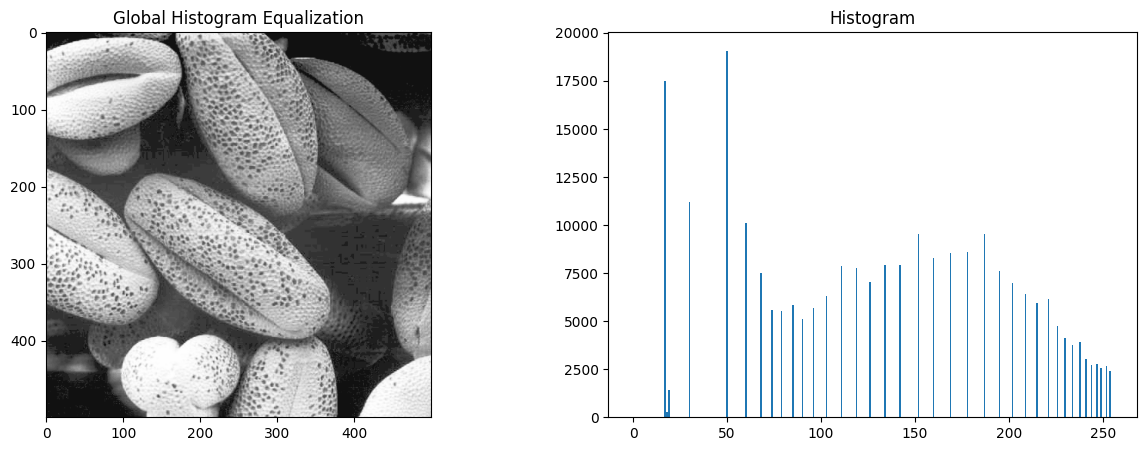

In [ ]:
# To apply histogram equalization multiple times
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)

plt.subplot(1,2,1)
equalized_pic = global_HistEqual(img3)
plt.imshow(equalized_pic)
plt.title("Global Histogram Equalization")
cv2.imwrite("equalized_image.png", equalized_pic)

plt.subplot(1,2,2)
plt.title("Histogram")
histogram(equalized_pic,print = 1)


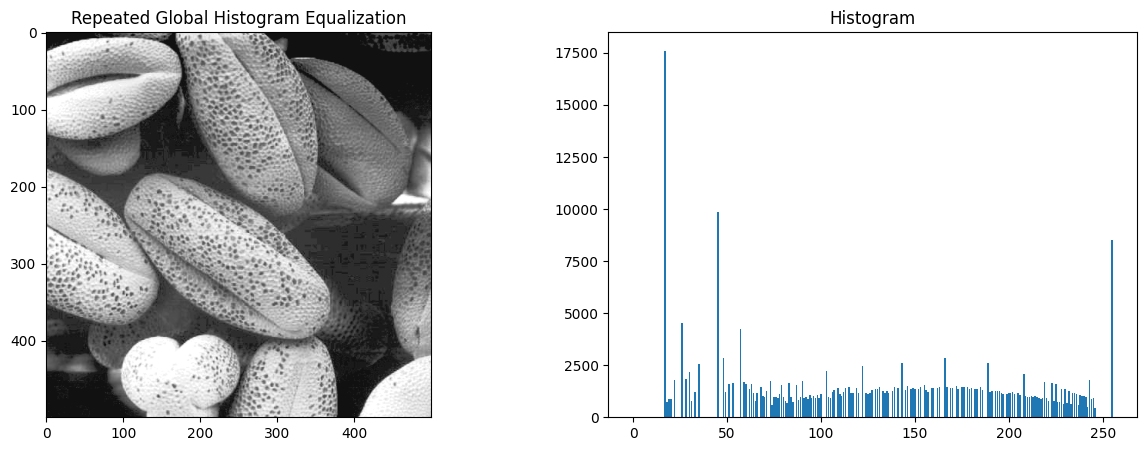

In [ ]:
equalized_pic_1 = cv2.imread("/content/beans1.tif")
equalized_pic_1 = global_HistEqual(equalized_pic_1)

fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)

plt.subplot(1,2,1)
plt.imshow(equalized_pic_1)
plt.title("Repeated Global Histogram Equalization")

plt.subplot(1,2,2)
plt.title("Histogram of Repeated Global HE")
histogram(equalized_pic_1,print = 1)
plt.show()

<h2>1. Why repeated application of histogram equalization doesn't produce any further improvements on output images?</h2>

<b>Answer :</b>
Repeated application of histogram equalization techniques doesn't produce further improvements on output images because the histogram has already been equalized and distributed across the whole dynamic range. Once an image has undergone histogram equalization, its pixel values are redistributed to achieve a desired contrast or brightness level, so repeating the process will result in the same histogram thus no change will be observed.


# Task 3

Implement Local Histogram Equalization (LHE) on gray scale images.


**Local Histogram Equalization**: This function performs local histogram equalization on an input image to enhance contrast by adjusting pixel values in small windows (or regions) of the image.

In [ ]:
def local_histogram_equalization(image, N, M, stride=1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    height, width = gray_image.shape

    result = np.zeros((height, width), dtype=np.uint8)

    for i in range(0, height - N + 1, stride):
        for j in range(0, width - M + 1, stride):
            local_region = gray_image[i : i + N, j : j + M]

            hist = np.histogram(local_region, bins=256, range=(0, 256))[0]
            cdf = hist.cumsum()
            cdf = (cdf * 255) / cdf.max()
            cdf = cdf.astype(np.uint8)

            equalized_region = cdf[local_region]

            result[i : i + N, j : j + M] = equalized_region

    return result


# Task 3: Output and Analysis
Use your previously implemented function to show the output of local histogram equalization on a sample image. Provide your analysis on the following topic:
<ol>
<li> Why do you have annoying side effects at the boundary of local image regions? </li>
<li> What is the effect of changing the stride? </li>
</ol>

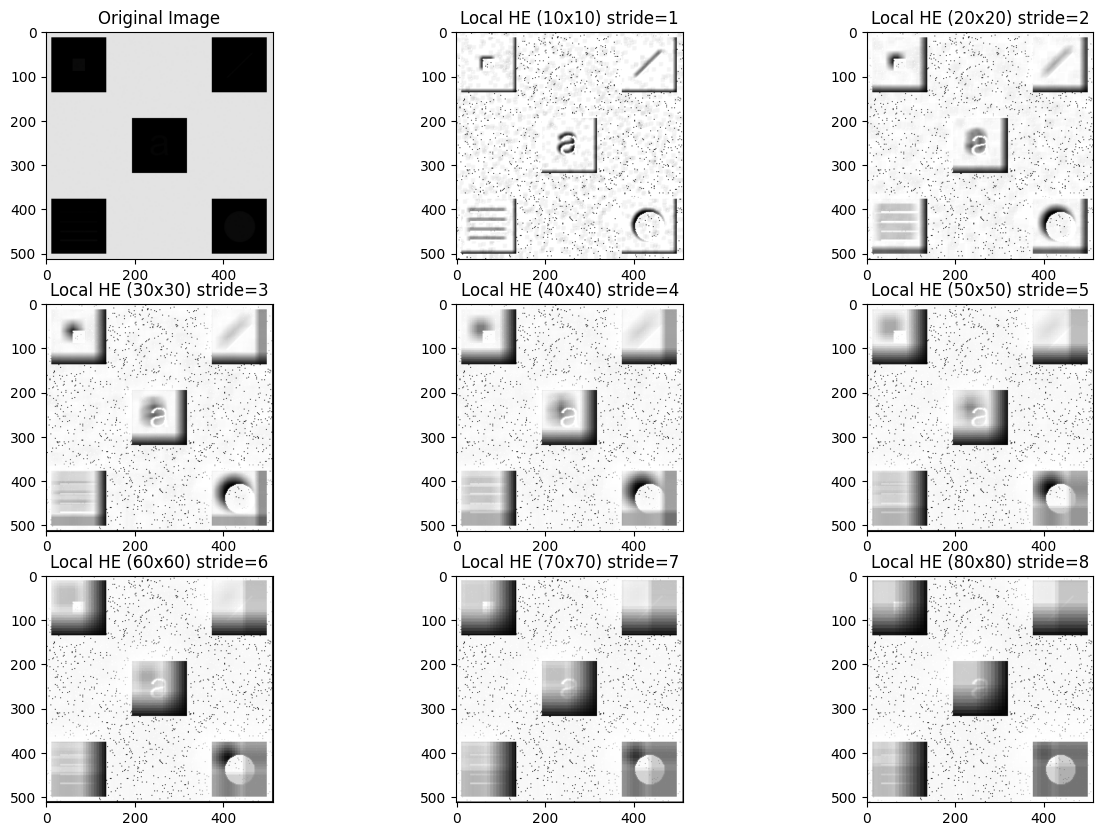

In [ ]:
# Plotting
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, width_ratios=[2, 2, 2], height_ratios=[2, 2, 2], wspace=0.3, hspace=2)

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(3, 3, 2)
plt.title("Local HE (10x10) stride=1")
plt.imshow(local_histogram_equalization(img3, 10, 10, stride=1), cmap='gray')

plt.subplot(3, 3, 3)
plt.title("Local HE (20x20) stride=2")
plt.imshow(local_histogram_equalization(img3, 20, 20, stride=2), cmap='gray')

plt.subplot(3, 3, 4)
plt.title("Local HE (30x30) stride=3")
plt.imshow(local_histogram_equalization(img3, 30, 30, stride=3), cmap='gray')

plt.subplot(3, 3, 5)
plt.title("Local HE (40x40) stride=4")
plt.imshow(local_histogram_equalization(img3, 40, 40, stride=4), cmap='gray')

plt.subplot(3, 3, 6)
plt.title("Local HE (50x50) stride=5")
plt.imshow(local_histogram_equalization(img3, 50, 50, stride=5), cmap='gray')

plt.subplot(3, 3, 7)
plt.title("Local HE (60x60) stride=6")
plt.imshow(local_histogram_equalization(img3, 60, 60, stride=6), cmap='gray')

plt.subplot(3, 3, 8)
plt.title("Local HE (70x70) stride=7")
plt.imshow(local_histogram_equalization(img3, 70, 70, stride=7), cmap='gray')

plt.subplot(3, 3, 9)
plt.title("Local HE (80x80) stride=8")
plt.imshow(local_histogram_equalization(img3, 80, 80, stride=8), cmap='gray')

plt.show()

<h2>1. Why do you have annoying side effects at the boundary of local image regions?</h2>

<b>Answer :</b>
Local histogram equalization enhances contrast and details within small regions of an image by adjusting pixel values based on the histogram of each localized area. However, this process can lead to noticeable side effects, particularly at <b><i>image edges</b></i>. As the windows slide across the image, local histogram equalization can emphasize the contrast between the processed region and the surrounding areas, potentially creating visible artifacts. This effect is especially pronounced with smaller windows, as the differences in intensity distribution between neighboring regions lead to sharp transitions, resulting in unsmooth boundaries. These sharp transitions are more noticeable to the human eye, reducing the overall smoothness of the image.



<h2>2. What is the effect of changing the stride?</h2>
<p>Changing the stride in local histogram equalization affects how the window moves across the image:</p>
<ul>
    <li><strong>Smaller stride</strong>: More overlap between windows, smoother transitions, fewer artifacts, but higher computational cost.</li>
    <li><strong>Larger stride</strong>: Less overlap, sharper transitions, more noticeable artifacts, but faster processing.</li>
</ul>
<p>Smaller strides provide smoother results, while larger strides may cause more visible artifacts.</p>
